In [19]:
using StatsPlots
theme(:wong2)
using DataFrames
using RCall


# Set CRAN mirror and install package
R"""
options(repos = c(CRAN = "https://cloud.r-project.org"))
if (!require('palmerpenguins')) install.packages('palmerpenguins')
library(palmerpenguins)
"""

# Get the penguins dataset into Julia
penguins = rcopy(R"penguins")

# so data, so adorable
println(describe(penguins))



8×7 DataFrame
 Row │ variable           mean     min     median  max        nmissing  eltype                            
     │ Symbol             Union…   Any     Union…  Any        Int64     Type                              
─────┼────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ species                     Adelie          Gentoo            0  CategoricalValue{String, UInt32}
   2 │ island                      Biscoe          Torgersen         0  CategoricalValue{String, UInt32}
   3 │ bill_length_mm     43.9219  32.1    44.45   59.6              2  Union{Missing, Float64}
   4 │ bill_depth_mm      17.1512  13.1    17.3    21.5              2  Union{Missing, Float64}
   5 │ flipper_length_mm  200.915  172     197.0   231               2  Union{Missing, Int64}
   6 │ body_mass_g        4201.75  2700    4050.0  6300              2  Union{Missing, Int64}
   7 │ sex                         female          male             11  Uni

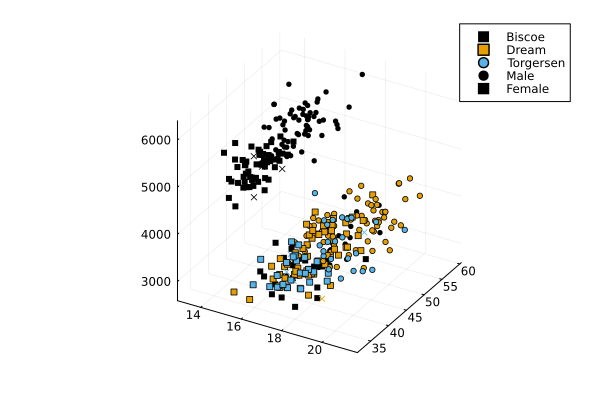

In [28]:
function sex_to_shape(sex_val)
    if ismissing(sex_val)
        return :x  # Use 'x' for missing values
    elseif sex_val == "male"
        return :circle
    else  # female
        return :square
    end
end

# Apply the mapping
penguins.marker_shape = sex_to_shape.(penguins.sex)

p = @df penguins scatter(
    :bill_depth_mm,
    :bill_length_mm,
    :body_mass_g,
    group=:island,
    markershape=:marker_shape,
    markersize=3,
    legend_position=:topright
)

# Add shape legend manually
scatter!([], [], markershape=:circle, color=:black, label="Male", legend=:topright)
scatter!([], [], markershape=:square, color=:black, label="Female", legend=:topright)
